# Reference guide: How to handle outliers
Previously, you watched two videos about how to detect outliers and why handling outliers can be an important part of data cleaning. At this point, you likely have a good understanding of this. It is important to not only detect outliers, but also to have a plan for them.

That is precisely what you will review in this reading. Once you’ve detected outliers in your dataset—whether global, contextual, or collective—how do you handle them? When it comes to exploratory data analysis, or EDA, there are essentially three main ways to handle outliers: delete, reassign, or leave them in.

Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis. To help you make the decision, you can start with these general guidelines:

- **Delete them**: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least. 

- **Reassign them**: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values. 

- **Leave them**: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

The videos discussing outliers went into detail on how to handle outliers when you leave them in the dataset. In this reading, you will learn about some techniques for deleting and reassigning outliers. 

### **1. Delete them.** 
For one way to delete outlier values, recall the coding you saw in the walkthrough video on outliers. In that video, the instructor coded a box plot to help you visualize two different outliers, as shown here: 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Read data
df = pd.read_csv('eda_outliers_dataset1.csv')

In [5]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column 
df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)

C:\Users\amurd\AppData\Local\Temp\ipykernel_20456\2525879430.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


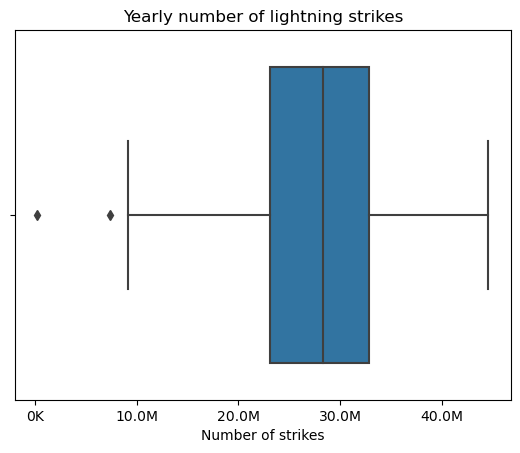

In [6]:
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

The instructor then used the following code to find the lower limit—8.6M.  

In [8]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: ', readable_numbers(lower_limit))

Lower limit is:  8.6M


Next, a Boolean mask was used to filter the dataframe so it only contained rows where the number of strikes was less than the lower limit.

In [9]:
print(df[df['number_of_strikes'] < lower_limit])

    year  number_of_strikes number_of_strikes_readable
1   2019             209166                       209K
33  1987            7378836                       7.4M


Once you know the cutoff points for outliers, if you want to delete them, you can use a Boolean mask to select all rows such that: lower limit ≤ values ≤ upper limit.  

In [10]:
mask = (df['number_of_strikes'] >= lower_limit) & (df['number_of_strikes'] <=
upper_limit)

df = df[mask].copy()
print(df)

    year  number_of_strikes number_of_strikes_readable
0   2020           15620068                      15.6M
2   2018           44600989                      44.6M
3   2017           35095195                      35.1M
4   2016           41582229                      41.6M
5   2015           37894191                      37.9M
6   2014           34919173                      34.9M
7   2013           27600898                      27.6M
8   2012           28807552                      28.8M
9   2011           31392058                      31.4M
10  2010           29068965                      29.1M
11  2009           30100585                      30.1M
12  2008           29790934                      29.8M
13  2007           30529064                      30.5M
14  2006           33292382                      33.3M
15  2005           38168699                      38.2M
16  2004           40023951                      40.0M
17  2003           39092327                      39.1M
18  2002  

Next, you’ll consider reassigning outliers by deriving new values that are a better fit for the dataset. 

### **2. Reassigning them.**
Instead of deleting outliers, you can always reassign them, that is, change the values to ones that fit within the general distribution of the dataset. There are two common ways to do this, but many different ways can be used, depending on your use case: 

**1. Create a floor and ceiling at a quantile:** For example, you could place walls at the 90th and 10th percentile of the distribution of data values. Any value above the 90% mark or below the 10% mark are changed to fit within the walls you set. Here is an example of what that code might look like:

In [12]:
# Calculate 10th percentile
tenth_percentile = np.percentile(df['number_of_strikes'], 10)

# Calculate 90th percentile
ninetieth_percentile = np.percentile(df['number_of_strikes'], 90)

# Apply lambda function to replace outliers with thresholds defined above
df['number_of_strikes'] = df['number_of_strikes'].apply(lambda x: (
    tenth_percentile if x < tenth_percentile 
    else ninetieth_percentile if x > ninetieth_percentile 
    else x))
df['number_of_strikes']

0     15940288.56
2     38916837.68
3     35095195.00
4     38916837.68
5     37894191.00
6     34919173.00
7     27600898.00
8     28807552.00
9     31392058.00
10    29068965.00
11    30100585.00
12    29790934.00
13    30529064.00
14    33292382.00
15    38168699.00
16    38916837.68
17    38916837.68
18    29916767.00
19    25470095.00
20    26276135.00
21    27758681.00
22    28802221.00
23    26986915.00
24    26190094.00
25    22763540.00
26    25094010.00
27    24206929.00
28    16371876.00
29    16900934.00
30    15940288.56
31    15940288.56
32    15940288.56
Name: number_of_strikes, dtype: float64

**2. Impute the average:** In some cases, it might be best to reassign all outlier values to match the median or mean value. This will ensure that your median and distribution are based solely on the non-outlier values, leaving the original outliers excluded. The actual imputation or reassigning of values can be pretty simple if you’ve already found the outliers. The following code block calculates the median of the values greater than the lower limit. Then it imputes the median where values are lower than the lower limit.

In [16]:
# Reset dataset
df = pd.read_csv('eda_outliers_dataset1.csv')

# Calculate median of all NON-OUTLIER values
median = np.median(df['number_of_strikes'][df['number_of_strikes'] >= lower_limit])

# Impute the median for all values < lower_limit
df['number_of_strikes'] = np.where(df['number_of_strikes'] < lower_limit, median, df['number_of_strikes'] )
df['number_of_strikes']

0     15620068.0
1     28804886.5
2     44600989.0
3     35095195.0
4     41582229.0
5     37894191.0
6     34919173.0
7     27600898.0
8     28807552.0
9     31392058.0
10    29068965.0
11    30100585.0
12    29790934.0
13    30529064.0
14    33292382.0
15    38168699.0
16    40023951.0
17    39092327.0
18    29916767.0
19    25470095.0
20    26276135.0
21    27758681.0
22    28802221.0
23    26986915.0
24    26190094.0
25    22763540.0
26    25094010.0
27    24206929.0
28    16371876.0
29    16900934.0
30    15839052.0
31    14245186.0
32     9150440.0
33    28804886.5
Name: number_of_strikes, dtype: float64

**Note:** Outside of EDA, machine learning and regression modeling have more complex variations on dealing with outliers. You will learn more about those topics later. 

### Key Takeaways
After detecting the outliers in a dataset, it is essential that you determine a strategy for how to handle them. Because every dataset and data-based problem is different, your strategy will vary. For the most part, you will be choosing between deleting, reassigning, or leaving outliers. 